[View in Colaboratory](https://colab.research.google.com/github/battlerhythm/tensorflow/blob/master/8.2%20Autoencoder.ipynb)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# Hyper parameters
learning_rate = 0.01
training_epoch = 20    # 전체 데이터를 학습할 총 횟수
batch_size = 100       # 미니배치로 한 번에 학습할 데이터
n_hidden = 256         # 은닉층의 뉴런 개수 
n_input = 28*28        # 입력값의 크기

X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Epoch: 0001 Avg. cost = 0.1967
Epoch: 0002 Avg. cost = 0.0627
Epoch: 0003 Avg. cost = 0.0514
Epoch: 0004 Avg. cost = 0.0443
Epoch: 0005 Avg. cost = 0.0416
Epoch: 0006 Avg. cost = 0.0395
Epoch: 0007 Avg. cost = 0.0381
Epoch: 0008 Avg. cost = 0.0372
Epoch: 0009 Avg. cost = 0.0367
Epoch: 0010 Avg. cost = 0.0361
Epoch: 0011 Avg. cost = 0.0354
Epoch: 0012 Avg. cost = 0.0340
Epoch: 0013 Avg. cost = 0.0336
Epoch: 0014 Avg. cost = 0.0330
Epoch: 0015 Avg. cost = 0.0327
Epoch: 0016 Avg. cost = 0.0324
Epoch: 0017 Avg. cost = 0.0322
Epoch: 0018 Avg. cost = 0.0321
Epoch: 0019 Avg. cost = 0.0319
Epoch: 0020 Avg. cost = 0.0317
최적화 완료!


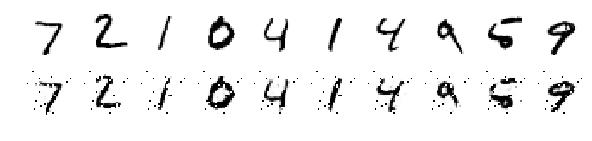

In [3]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')


sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()